# Day 5: Data Manipulation and Analysis
## Notebook 5: SciPy Statistics

**Introduction to Scientific Programming**  
CNC-UC | 2025

This notebook covers:
- Statistical testing basics
- Fitting distributions
- Correlation analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

print("Setup complete!")

Setup complete!


## 1. Statistical Testing Basics

In [2]:
# Create experimental data
np.random.seed(42)

# Control group (mean=500ms, std=50)
control_group = np.random.normal(500, 50, 30)

# Drug treatment group (mean=450ms, std=50)
treatment_group = np.random.normal(450, 50, 30)

print(f"Control: mean={control_group.mean():.2f}, std={control_group.std():.2f}")
print(f"Treatment: mean={treatment_group.mean():.2f}, std={treatment_group.std():.2f}")

Control: mean=490.59, std=44.24
Treatment: mean=443.94, std=45.77


### Independent samples t-test

t-statistic: 3.946
p-value: 0.0002

Result: Significant difference (p < 0.05)


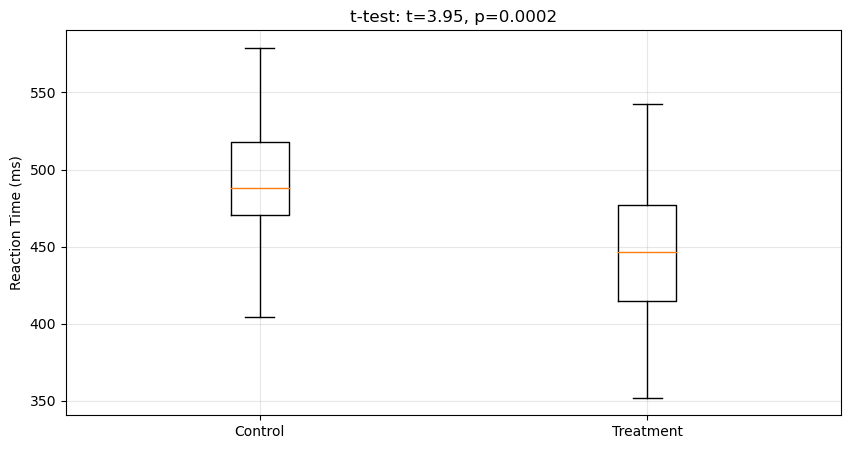

In [3]:
# Two independent groups
t_stat, p_value = stats.ttest_ind(control_group, treatment_group)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nResult: Significant difference (p < 0.05)")
else:
    print("\nResult: No significant difference (p >= 0.05)")

# Visualize
plt.figure(figsize=(10, 5))
plt.boxplot([control_group, treatment_group], labels=['Control', 'Treatment'])
plt.ylabel('Reaction Time (ms)')
plt.title(f't-test: t={t_stat:.2f}, p={p_value:.4f}')
plt.grid(True, alpha=0.3)
plt.show()

### Paired samples t-test

In [4]:
# Same subjects, two conditions
pre_treatment = np.random.normal(500, 50, 25)
post_treatment = pre_treatment - np.random.normal(30, 20, 25)  # Improvement

t_stat, p_value = stats.ttest_rel(pre_treatment, post_treatment)

print(f"Paired t-test:")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.4f}")
print(f"\nMean improvement: {(pre_treatment - post_treatment).mean():.2f} ms")

Paired t-test:
  t-statistic: 10.034
  p-value: 0.0000

Mean improvement: 28.99 ms


### Mann-Whitney U test (non-parametric)

In [5]:
# Non-parametric alternative to t-test
u_stat, p_value = stats.mannwhitneyu(control_group, treatment_group)

print(f"Mann-Whitney U test:")
print(f"  U-statistic: {u_stat:.3f}")
print(f"  p-value: {p_value:.4f}")

Mann-Whitney U test:
  U-statistic: 684.000
  p-value: 0.0006


### ANOVA (3+ groups)

One-way ANOVA:
  F-statistic: 19.966
  p-value: 0.0000


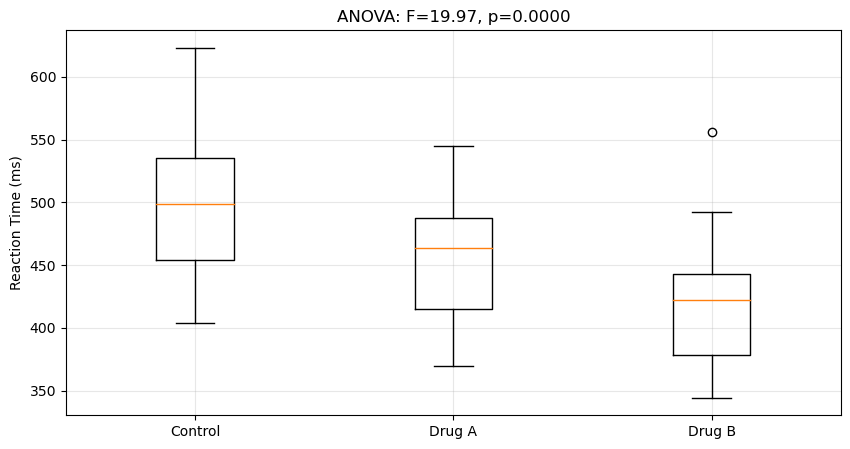

In [6]:
# Three groups
group1 = np.random.normal(500, 50, 30)
group2 = np.random.normal(450, 50, 30)
group3 = np.random.normal(420, 50, 30)

f_stat, p_value = stats.f_oneway(group1, group2, group3)

print(f"One-way ANOVA:")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  p-value: {p_value:.4f}")

# Visualize
plt.figure(figsize=(10, 5))
plt.boxplot([group1, group2, group3], labels=['Control', 'Drug A', 'Drug B'])
plt.ylabel('Reaction Time (ms)')
plt.title(f'ANOVA: F={f_stat:.2f}, p={p_value:.4f}')
plt.grid(True, alpha=0.3)
plt.show()

## 2. Fitting Distributions to Data

In [7]:
# Simulated interspike intervals (exponential distribution)
np.random.seed(42)
isi_data = np.random.exponential(0.02, 1000)  # Mean ISI = 20ms

print(f"ISI data: mean={isi_data.mean():.4f}, std={isi_data.std():.4f}")

ISI data: mean=0.0195, std=0.0194


### Fit exponential distribution

Fitted exponential distribution:
  Location: 0.0001
  Scale (1/λ): 0.0194
  Rate (λ): 51.66 Hz


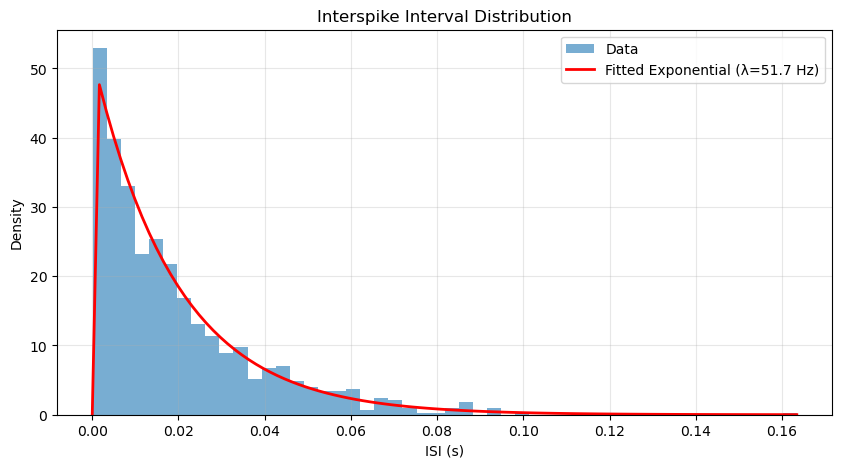

In [8]:
# Fit exponential distribution
loc, scale = stats.expon.fit(isi_data)

print(f"Fitted exponential distribution:")
print(f"  Location: {loc:.4f}")
print(f"  Scale (1/λ): {scale:.4f}")
print(f"  Rate (λ): {1/scale:.2f} Hz")

# Generate theoretical PDF
x = np.linspace(0, isi_data.max(), 100)
pdf_fitted = stats.expon.pdf(x, loc=loc, scale=scale)

# Visualize
plt.figure(figsize=(10, 5))
plt.hist(isi_data, bins=50, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf_fitted, 'r-', linewidth=2, label=f'Fitted Exponential (λ={1/scale:.1f} Hz)')
plt.xlabel('ISI (s)')
plt.ylabel('Density')
plt.title('Interspike Interval Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Fit normal distribution

Fitted normal distribution:
  Mean (μ): 101.48
  Std (σ): 14.83


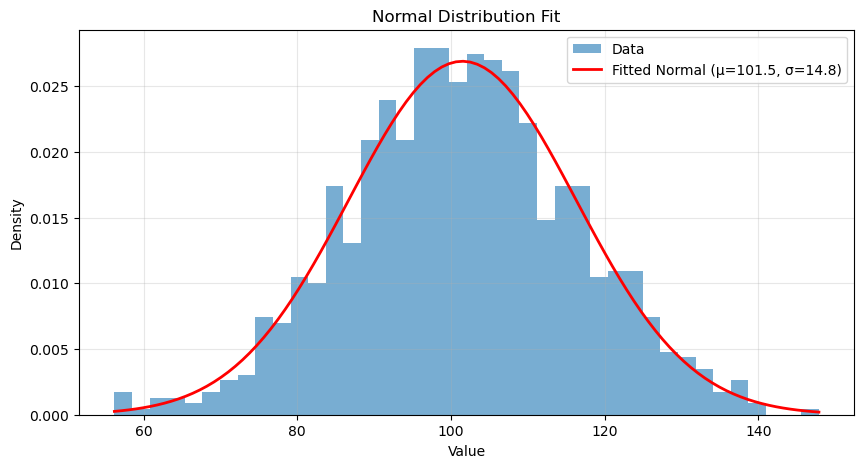

In [9]:
# Normally distributed data
normal_data = np.random.normal(100, 15, 1000)

# Fit normal distribution
mu, sigma = stats.norm.fit(normal_data)

print(f"Fitted normal distribution:")
print(f"  Mean (μ): {mu:.2f}")
print(f"  Std (σ): {sigma:.2f}")

# Generate theoretical PDF
x = np.linspace(normal_data.min(), normal_data.max(), 100)
pdf_fitted = stats.norm.pdf(x, mu, sigma)

# Visualize
plt.figure(figsize=(10, 5))
plt.hist(normal_data, bins=40, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf_fitted, 'r-', linewidth=2, label=f'Fitted Normal (μ={mu:.1f}, σ={sigma:.1f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from scipy.stats import gaussian_kde

# Create KDE estimator
kde = gaussian_kde(data)

# Evaluate density at points
x = np.linspace(data.min(), data.max(), 200)
density = kde(x)

# Plot smoothed density estimate
plt.plot(x, density, label='KDE')
plt.hist(data, bins=30, density=True, alpha=0.3)

### Goodness of fit test

In [ ]:
# Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(normal_data, 'norm', args=(mu, sigma))

print(f"Kolmogorov-Smirnov test:")
print(f"  KS statistic: {ks_stat:.4f}")
print(f"  p-value: {ks_p:.4f}")

if ks_p > 0.05:
    print("  Result: Data is consistent with normal distribution")
else:
    print("  Result: Data significantly deviates from normal distribution")

Kolmogorov-Smirnov test:
  KS statistic: 0.0138
  p-value: 0.9901
  Result: Data is consistent with normal distribution


### Kernel Density Estimation (KDE)

Data: n=500, mean=120.15, std=29.95


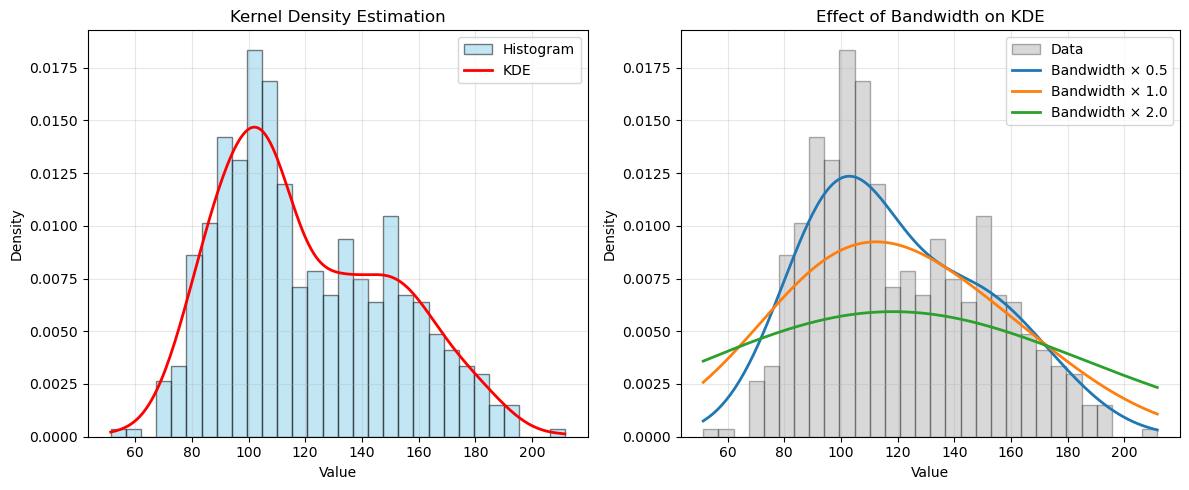


KDE is useful for:
  - Smoothing noisy histograms
  - Estimating probability densities
  - Detecting multimodal distributions
  - Visualizing continuous distributions from discrete samples


In [19]:
from scipy.stats import gaussian_kde

# Generate sample data (bimodal distribution)
np.random.seed(42)
data = np.concatenate([
    np.random.normal(100, 15, 300),  # First mode
    np.random.normal(150, 20, 200)   # Second mode
])

print(f"Data: n={len(data)}, mean={data.mean():.2f}, std={data.std():.2f}")

# Create KDE estimator
kde = gaussian_kde(data)

# Evaluate density at points
x = np.linspace(data.min(), data.max(), 200)
density = kde(x)

# Visualize
plt.figure(figsize=(12, 5))

# Subplot 1: KDE vs Histogram
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black', label='Histogram')
plt.plot(x, density, 'r-', linewidth=2, label='KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Different bandwidths
plt.subplot(1, 2, 2)
plt.hist(data, bins=30, density=True, alpha=0.3, color='gray', edgecolor='black', label='Data')

# Try different bandwidths
for bw_factor in [0.5, 1.0, 2.0]:
    kde_bw = gaussian_kde(data, bw_method=bw_factor)
    density_bw = kde_bw(x)
    plt.plot(x, density_bw, linewidth=2, label=f'Bandwidth × {bw_factor}')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Effect of Bandwidth on KDE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKDE is useful for:")
print("  - Smoothing noisy histograms")
print("  - Estimating probability densities")
print("  - Detecting multimodal distributions")
print("  - Visualizing continuous distributions from discrete samples")

## 3. Correlation Analysis

In [12]:
# Create correlated data
np.random.seed(42)
n = 50

# Gene expression data (positively correlated)
gene_A = np.random.normal(100, 20, n)
gene_B = gene_A * 0.8 + np.random.normal(0, 10, n)  # Correlated

df_genes = pd.DataFrame({
    'gene_A': gene_A,
    'gene_B': gene_B
})

print("Gene expression data:")
df_genes.head()

Gene expression data:


,gene_A,gene_B
0,109.934283,91.188266
1,97.234714,73.936948
2,112.953771,83.593797
3,130.460597,110.485241
4,95.316933,86.563541


### Pearson correlation

Pearson correlation:
  r = 0.878
  p = 0.0000


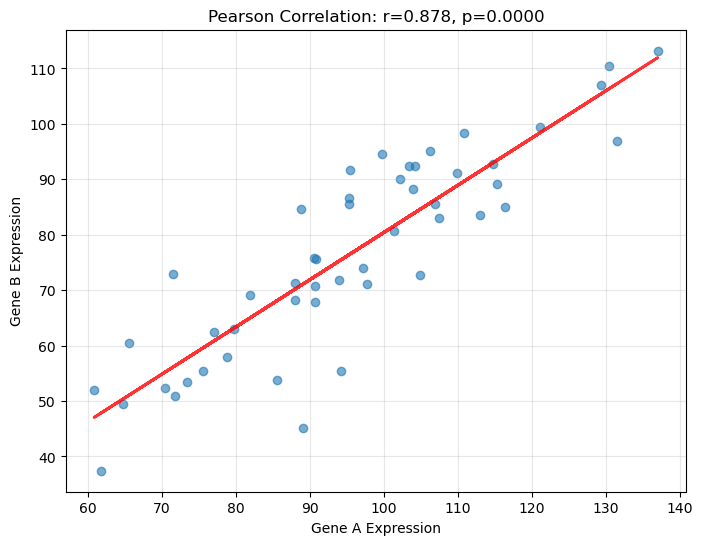

In [13]:
# Pearson correlation
r, p = stats.pearsonr(gene_A, gene_B)

print(f"Pearson correlation:")
print(f"  r = {r:.3f}")
print(f"  p = {p:.4f}")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(gene_A, gene_B, alpha=0.6)
plt.xlabel('Gene A Expression')
plt.ylabel('Gene B Expression')
plt.title(f'Pearson Correlation: r={r:.3f}, p={p:.4f}')
plt.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(gene_A, gene_B, 1)
p_line = np.poly1d(z)
plt.plot(gene_A, p_line(gene_A), "r-", alpha=0.8, linewidth=2)
plt.show()

### Spearman correlation

In [14]:
# Spearman correlation (non-parametric)
rho, p = stats.spearmanr(gene_A, gene_B)

print(f"Spearman correlation:")
print(f"  ρ = {rho:.3f}")
print(f"  p = {p:.4f}")

Spearman correlation:
  ρ = 0.868
  p = 0.0000


### Correlation matrix

Correlation matrix:
          BDNF      TrkB      CREB       Arc
BDNF  1.000000  0.887439 -0.217154 -0.142237
TrkB  0.887439  1.000000 -0.169131 -0.088225
CREB -0.217154 -0.169131  1.000000  0.807738
Arc  -0.142237 -0.088225  0.807738  1.000000


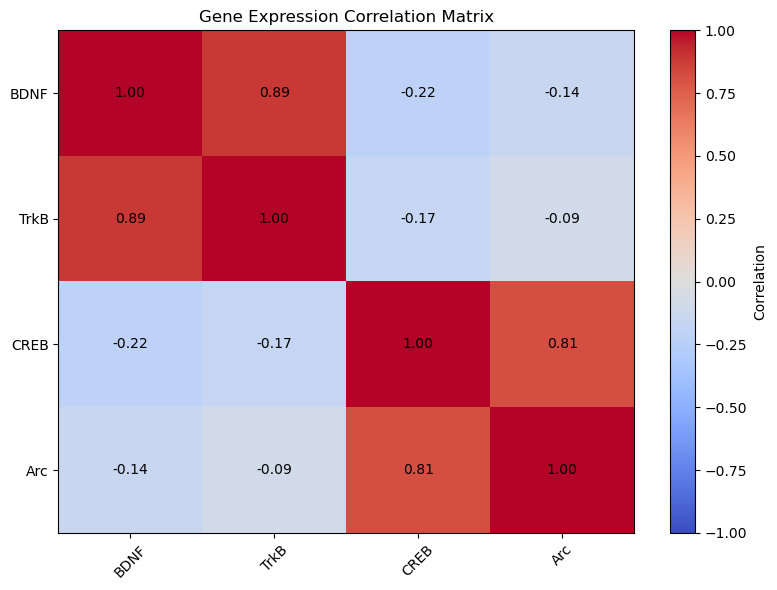

In [17]:
# Create dataset with multiple genes
df_multi = pd.DataFrame({
    'BDNF': np.random.normal(100, 20, 50),
    'TrkB': np.random.normal(85, 15, 50),
    'CREB': np.random.normal(120, 25, 50),
    'Arc': np.random.normal(95, 18, 50)
})

# Add correlations
df_multi['TrkB'] = df_multi['BDNF'] * 0.6 + df_multi['TrkB'] * 0.4
df_multi['Arc'] = df_multi['CREB'] * 0.5 + df_multi['Arc'] * 0.5

# Correlation matrix
corr_matrix = df_multi.corr()

print("Correlation matrix:")
print(corr_matrix)

# Visualize with heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Gene Expression Correlation Matrix')

# Add correlation values
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

## Summary

In this notebook we covered:
- Statistical testing (t-tests, Mann-Whitney, ANOVA)
- Fitting distributions (exponential, normal)
- Goodness of fit tests
- Correlation analysis (Pearson, Spearman)
- Correlation matrices

**Complete lecture series finished!**

In [18]:
print("All notebooks complete!")
print("You now have a comprehensive set of examples for data manipulation and analysis.")

All notebooks complete!
You now have a comprehensive set of examples for data manipulation and analysis.
